In [2]:
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, Aer, execute 
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import HGate
import numpy as np

# What is [Qiskit(Kis-Kit)](https://qiskit.org/)?
Qiskit is an open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
You can use Qiskit to construct quantum programs and run them on simulators or real quantum computers. With our extensive network of providers you can compile your Qiskit code for a huge range of different backends, more than any other quantum framework! 


---
### A Brief and Valuable Exploration of  Qiskit's [Circuit Library](https://qiskit.org/documentation/apidoc/circuit_library.html)
---
The circuit library is a collection of well-studied and valuable circuits, directives, and gates. We call them valuable for different reasons, for instance they can serve as building blocks for algorithms or they are circuits that we think are hard to simulate classically.

![Quantum Logic Gates](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Quantum_Logic_Gates.png/800px-Quantum_Logic_Gates.png)

---
### Standard Gates
---
These operations are **reversible** unitary gates and they all subclass [Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.Gate.html#qiskit.circuit.Gate). As a consequence, they all have the methods to_matrix(), power(), and control(), which we can generally only apply to unitary operations.

---
[XGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.XGate.html#qiskit.circuit.library.XGate), the single-qubit Pauli-X gate

Equivalent to a π radian rotation about the X axis. The gate is equivalent to a classical bit flip.

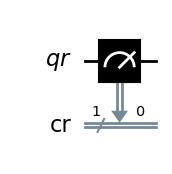

In [3]:
qc = QuantumCircuit(QuantumRegister(1,"qr"),ClassicalRegister(1,"cr"))
qc.measure(0,0)
qc.draw(output='mpl')

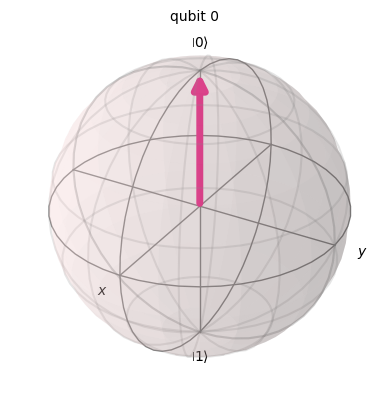

In [4]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend, shots=1000).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

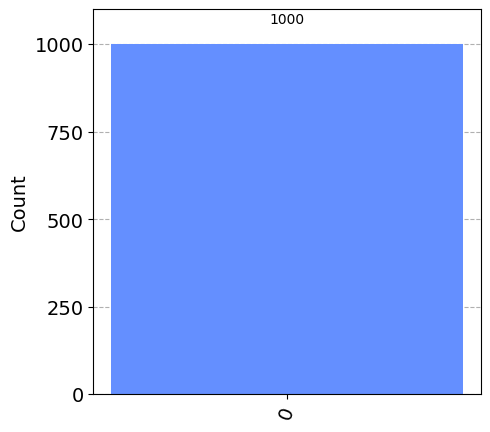

In [5]:
plot_histogram(result.get_counts(), (5,5))

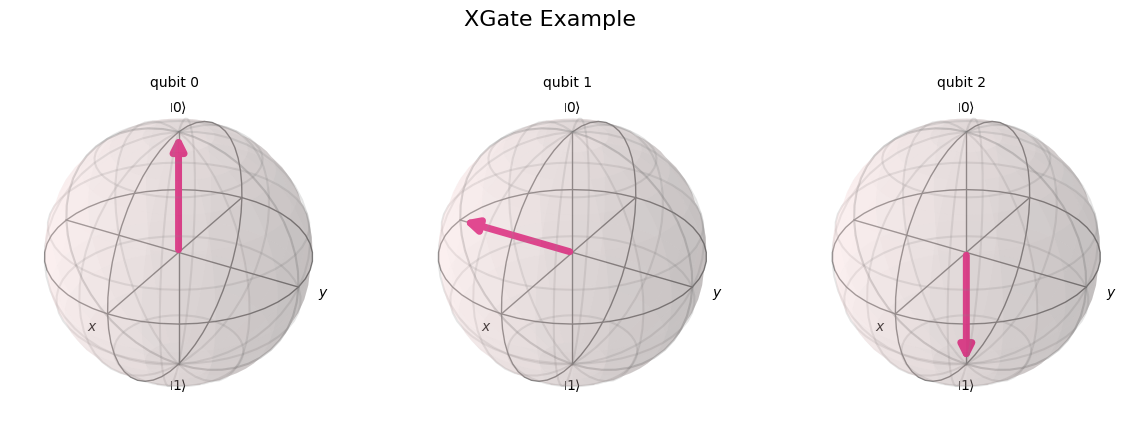

In [6]:
qc = QuantumCircuit(3,3)
qc.rx(np.pi/2,1)
qc.x(2)

statevector = Statevector(qc)
plot_bloch_multivector(statevector, title="XGate Example")


Given a range of numbers apply an XGate to the qubits in that range. Meaning, for range (0,1) apply XGates at q0, q1

In [ ]:
def x_gate(qc, range):
    #TODO Apply XGate to qc's qubits in range
    return qc

---

[ZGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZGate.html#qiskit.circuit.library.ZGate), the single-qubit Pauli-Z gate

Equivalent to a π radian rotation about the Z axis. The gate is equivalent to a phase flip.

In [ ]:
qc = QuantumCircuit(2,2)
qc.z(0)
qc.measure(0,0)
qc.draw(output='mpl')

In [ ]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend, shots=1000).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector, title="ZGate")

In [ ]:
plot_histogram(result.get_counts(), (5,5))

In [ ]:
qc = QuantumCircuit(3,3)
qc.h([0,1,2])
qc.rz(np.pi/2,1)
qc.z(2)


state = Statevector(qc)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend, shots=1000).result()


depth = qc.depth()
qc.draw(output='mpl')

In [ ]:
plot_histogram(result.get_counts(), (5,5))

In [ ]:
plot_bloch_multivector(state, title="ZGate Example")

In [ ]:
print("The Circuit Depth is: ",depth)

In [ ]:
def z_gate(qc, range): 
    #TODO Apply ZGate to qc's qubits in range
    return qc

[YGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.YGate.html#qiskit.circuit.library.YGate), the single-qubit Pauli-Y gate

Equivalent to a π radian rotation about the Y axis. The gate is equivalent to a bit and phase flip.

In [ ]:
qc = QuantumCircuit(3,3)
qc.ry(np.pi/2,1)
qc.y(2)
state = Statevector(qc)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw(output='mpl')

In [ ]:
plot_bloch_multivector(state, title="YGate Example")

In [ ]:
def y_gate(qc, range):
    #TODO Apply YGate to qc's qubits in range
    return qc


[SWAP Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.SwapGate.html#qiskit.circuit.library.SwapGate) is a symmetric and Clifford gate.
The gate is equivalent to a state swap and is a classical logic gate |a,b> -> |b,a>


In [ ]:
qc= QuantumCircuit(2,2)
qc.h(0)
state = Statevector(qc)
qc.swap(0,1)
state1 = Statevector(qc)
plot_bloch_multivector(state, title="Original State")

In [ ]:
plot_bloch_multivector(state1, title="After Swap")

In [ ]:
def swap_qubits(qc, q0, q1):
    #TODO Swap qubits q0 and q1
    return qc

[Hadamard Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.HGate.html#qiskit.circuit.library.HGate), Single-qubit Hadamard gate. 
Is used for a rotation of π about the X+Z axis. Hadamard is useful in representing superposition. Transforming a qubit in basis state of 
|0> or |1> -> |0> and |1>

In [ ]:
qc = QuantumCircuit(2,2)
qc.ry(np.pi/2,0)
qc.h(0)
qc.h(1)
state = Statevector(qc)
qc.draw(output='mpl')
gate = HGate()


In [ ]:
plot_bloch_multivector(state, title="Hadamard Example")

In [ ]:
def hadamard_gate(qc, range):
    #TODO Apply Controlled HadamardGate to qc's qubits in range
    return qc

[Controlled-Hadamard Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CHGate.html#qiskit.circuit.library.CHGate), applies a Hadamard on the *target* qubit if the *control* qubit is in the |1> state. This means Hadamard is applied conditionally!!

In [ ]:
qc = QuantumCircuit(4,4)
qc.x(0)
qc.ch(0,1)
qc.ch(2,3)
state = Statevector(qc)
qc.draw(output='mpl')

In [ ]:
plot_bloch_multivector(state, title="Controlled Hadamard Example")

In [ ]:
def control_hadamard(qc, control, target):
    #TODO Apply CHGate to qc's qubits with control and target
    return qc

[PhaseGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html#qiskit.circuit.library.PhaseGate), a single-qubit rotation about the Z axis.
This gate is equivalent to ZGate up to a phase factor.

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.p(9*np.pi/4,0)
qc.h(1)
state = Statevector(qc)
qc.draw(output='mpl')

In [ ]:
plot_bloch_multivector(state, title="Phase Gate Example")

In [ ]:
def control_phase(qc, theta, target, control):
    #TODO Apply Control-Phase Gate to qc's qubits with theta, target and control
    return qc

---
### Standard Directives and Standard Operations
---
Standard Operations, are non-reversible changes in the quantum state of the circuit.
Standard Directives are operations to the quantum stake that are meant to be interpreted by the backend or the [transpiler](https://qiskit.org/documentation/apidoc/transpiler.html).

In [ ]:
def reset_qubits(qc, range):
    #TODO Apply Reset to qc's qubits in range
    return qc

In [ ]:
def measure_qubits(qc, range):
    #TODO measure qc's qubits in range
    return qc

---
### Bell States and Quantum Entanglement
---
[Bell's states(EPR pairs)](https://en.wikipedia.org/wiki/Bell_state) are specific quantum state of two qubits that represent the simplest examples of [quantum entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement). Use the circuit diagram below to implement a bell state. The applications of quantum entanglement and Bell's states will be explained in Lab 3.

![Bell state #1](https://upload.wikimedia.org/wikipedia/commons/f/fc/The_Hadamard-CNOT_transform_on_the_zero-state.png)

In [ ]:
def bell_state(qc, target, control):
    #TODO implement bell state show in circuit diagram above
    return qc